In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐을 방지
fm._rebuild()

NanumBarunGothic


# 중요 범죄 분석

1.  

    모든 범죄가 아닌  중요 범죄만 분석 : 
        '강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'
    
    아래 파일을 이용하여 CCTV 갯수와 범죄 발생건수 및 인구수 에 대한 상관관계 분석    
        01. CCTV_result.csv / 
        02. crime_in_Seoul.csv / 02. crime_in_Seoul_include_gu_name.csv / 
        02. skorea_municipalities_geo_simple.json

    결과의 예 
    CCTV 갯수와 범죄 발생건수 / 범죄 발생건수 및 인구수 / CCTV 갯수와 인구수 상관관계 시각화
    CCTV 갯수와 범죄 발생건수 및 인구수 에 대한 상관관계 시각화
    범죄율에 대한 지도 시각화
    경찰서별 검거현황과 구별 범죄발생 현황을 시각화

2. 시계열 데이터 분석에 대하여 진행합니다..

In [2]:
!pip install googlemaps

In [3]:
import numpy as np
import pandas as pd
import googlemaps

In [4]:
crime_anal_police = pd.read_csv("./02. crime_in_Seoul.csv",
                                thousands=",", # 데이터내에 천단위 콤마(,) 
                                encoding="euc-kr")

In [5]:
gmaps_key = "API KEY"
gmaps = googlemaps.Client(gmaps_key)

gmaps.geocode("서울중부경찰서", language="ko")

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

구글맵으로 부터 관서명에 대한 위치를 얻기 위해서는
기존 "관서명" 컬럼의 데이터에 대한 정리가 필요.
중부서  =>  서울중부경찰서 로 변경이 필요

In [6]:
# 관서명 데이터 정리
station_name = []     # 정리된 관서명 저장

for name in crime_anal_police['관서명'] :
    station_name.append('서울' + str(name[: -1])+'경찰서')

In [7]:
# 서울시 경찰서의 주소, 위치 저장
station_address = []    # 서울시 경찰서의 주소 ('formatted_address')

In [8]:
station_lat = [] 
station_lng = []

for name in station_name :
    tmp= gmaps.geocode(name, language='ko')   # [{'address_ ~~~~ 'police']}]
    station_address.append(tmp[0].get('formatted_address'))
    
    tmp_loc = tmp[0].get('geometry')    # {'location': {'lat': 37.5636465, 'lng': 126.9895796},
    
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    
    # 바로 확인 (테스트용)
    print(name + "====> " + tmp[0].get('formatted_address'))

서울중부경찰서====> 대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서====> 대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서====> 대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서====> 대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서====> 대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서====> 대한민국 서울특별시 용산구 백범로 329
서울성북경찰서====> 대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서====> 대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서====> 대한민국 서울특별시 마포구 마포대로 183
서울영등포경찰서====> 대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서====> 대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서====> 대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서====> 대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서====> 대한민국 서울특별시 은평구 진흥로 58
서울강북경찰서====> 대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서====> 대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서====> 대한민국 서울특별시 중랑구 면목2동 198-1
서울강남경찰서====> 대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서====> 대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서====> 대한민국 서울특별시 강서구 화곡로 308
서울강동경찰서====> 대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서====> 대한민국 서울특별시 성북구 종암로 135
서울구로경찰서====> 대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서====> 대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서====> 대한민국 서울특별시 양천구 목동동로 99
서울송파경찰서====> 대한민국 서울특별

'대한민국 서울특별시 중구 을지로동 수표로 27'   => '중구'

행정 구역이 변경된 경찰서가 있는 지 확인.

동일한 구내에 두 개 이상의 경찰서가 존재하는 지 확인, (존재시 주 경찰서의 데이터 합)

In [9]:
# 경찰서 주소중, '구' 부분만 추출하여 별도의 리스트에 저장
gu_name =[]
for name in station_address:
    tmp = name.split() 
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)

In [10]:
# 추출된 구이름(gu_name)을 전체 데이터프레임(crime_anal_police)에 추가
crime_anal_police['구별'] = gu_name

# 만약 금천서가 금천구가 아닌 관악구(양천구)로 되어 있을 경우, 금천서의 구를 금천구로 변경
crime_anal_police.loc[crime_anal_police['관서명'] == '금천서', '구별'] ='금천구'

In [11]:
# 02. crime_in_Seoul_include_gu_name.csv
crime_anal_raw = pd.read_csv("./02. crime_in_Seoul_include_gu_name.csv",
                             encoding="utf-8",
                             index_col = 0)

In [12]:
# 1. pivot_table()을 이용하여 '관서별' => '구별' 
# 2. pivot_table()의 aggfunc=np.sum 을 설절하여 동일구내의 경찰서 데이터를 합하기
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)

In [13]:
# 5대 중요 범죄에 대한 검거율을 계산하여 crime_anal에 추가
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

In [14]:
# 데이터 스케이링 작업 : 검거율이 100을 넘는 데이터는 100으로 변경..
col_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율' ]

In [15]:
for colum in col_list:
    crime_anal.loc[crime_anal[colum] > 100, colum] = 100
    
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [16]:
crime_anal.tail()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
용산구,173,194,14,14,5,5,587,1557,1704,2050,89.175258,100.000000,100.000000,37.700706,83.121951
은평구,141,166,6,9,3,3,711,1914,2306,2653,84.939759,66.666667,100.000000,37.147335,86.920467
종로구,161,211,9,11,5,6,837,2184,1931,2293,76.303318,81.818182,83.333333,38.324176,84.212822
중구,111,170,6,9,2,3,859,2548,1964,2224,65.294118,66.666667,66.666667,33.712716,88.309353
중랑구,148,187,9,11,12,13,829,2135,2407,2847,79.144385,81.818182,92.307692,38.829040,84.545135


In [17]:
# 컬럼명 변경 : "강간 발생"  => " 발생" 부분을 삭제 => "강간" : DataFrame.rename('변경전' : '변경후')

crime_anal.rename(columns={'강간 발생':'강간',
                           '강도 발생':'강도',
                           '살인 발생':'살인',
                           '절도 발생':'절도',
                           '폭력 발생':'폭력'}, inplace=True)

In [18]:
# 비교할 데이터의 크기가 아주 심할 경우(범위가 넓을 경우), 최소값과 최대값에 대한 비율 전처리.
# MinMaxScalar 방법을 적용
# 데이터 스케일링을 위한 모듈 impport : sklearn의 preprocessing
from sklearn import preprocessing

In [19]:
# 1. 전처리할 데이터 설정을 위한 컬럼 추출
col = ['강간', '강도', '살인', '절도', '폭력']

# 2. 각 컬럼의 데이터를 추출
x = crime_anal[col].values

# 3. MinMaxScalar 객체 생성
min_max_scaler = preprocessing.MinMaxScaler()

# 4. MinMaxScaler 객체에 스케일링할 데이터를 전달
x_scaled = min_max_scaler.fit_transform(x.astype(float))

# 5. 결과 데이터를 데이터프레임에 저장
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)

In [20]:
# crime_anal_norm 에 검거율 추가
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

In [21]:
crime_anal_norm[col2] = crime_anal[col2]

In [22]:
# CCTV 데이터 로드 : 01. CCTV_result.csv
result_CCTV = pd.read_csv("./01. CCTV_result.csv",
                          encoding="utf-8",
                          index_col='구별')

In [23]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]

## 5대 중요범죄의 합을 구하여 crime_anal_norm의 '범죄' 컬럼에 추가
# col =['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)

In [24]:
# Seaborn 및 사각화 모듈 import
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


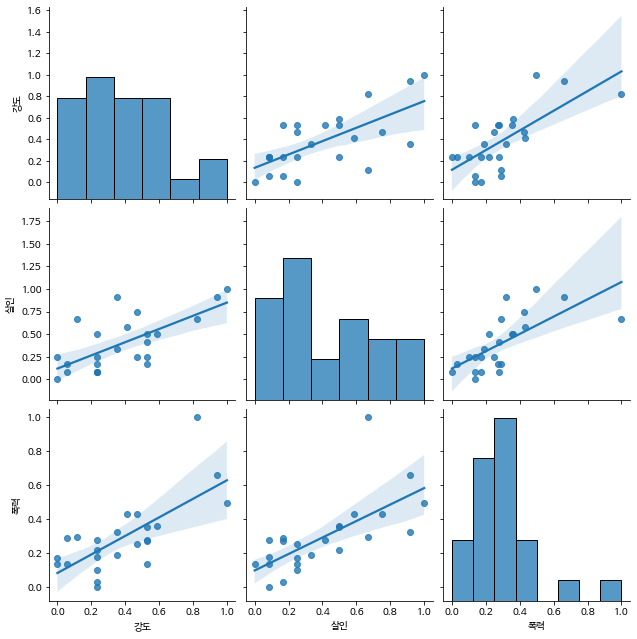

In [25]:
# 1. 강도, 살인, 폭력 : pairplot()
sns.pairplot(crime_anal_norm,
             vars=['강도', '살인', '폭력'],
             kind='reg',
             size=3)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


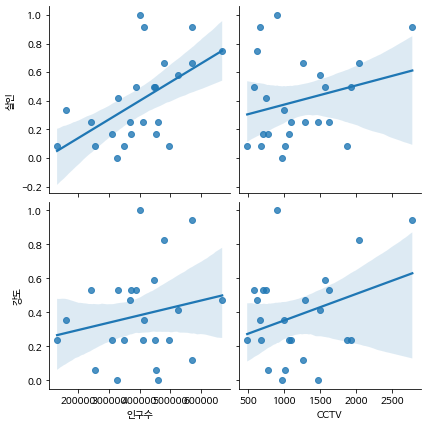

In [26]:
# 2. ['인구수', 'CCTV']  ['살인', '강도']  : 발생 건수
sns.pairplot(crime_anal_norm,
             x_vars=['인구수', 'CCTV'],
             y_vars=['살인', '강도'],
             kind='reg',
             size=3
             )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


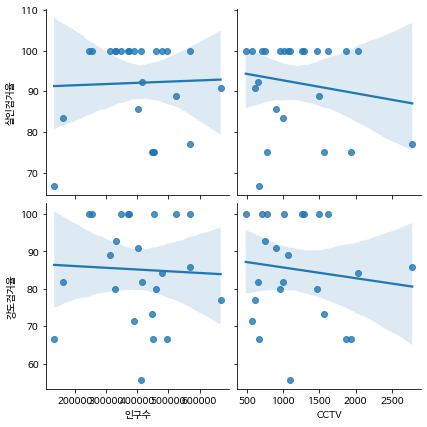

In [27]:
# 3. ['인구수', 'CCTV']  ['살인검거율', '강도검거율']
sns.pairplot(crime_anal_norm,
             x_vars=['인구수', 'CCTV'],
             y_vars=['살인검거율', '강도검거율'],
             kind='reg',
             size=3
             )
plt.show()

In [28]:
# 검거율에 대한 사긱화 : heatmap() 
# 검거율의 최대 값을 100으로 설정하여 heatmap() 을 통한 시각화
# col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

# 검거율의 합 => crime_anal_norm
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col2], axis=1)

tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100

# '검거' 컬럼을 기준으로 정렬
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

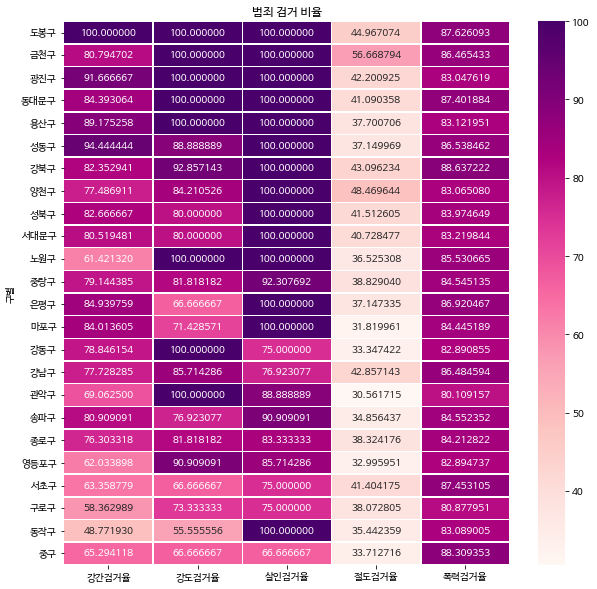

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[col2],
            annot=True,
            fmt='f',
            linewidths=0.5,
            cmap='RdPu')
plt.title('범죄 검거 비율')
plt.show()

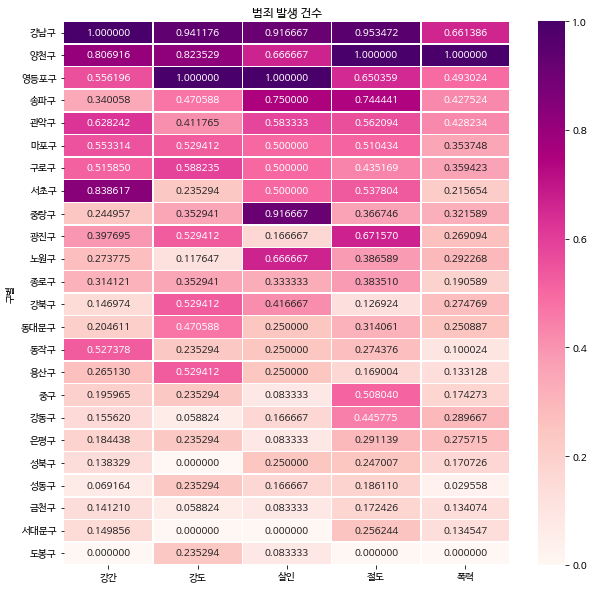

In [30]:
# 범죄 발생 건수 
# col =['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[col],
            annot=True,
            fmt='f',
            linewidths=0.5,
            cmap='RdPu')
plt.title('범죄 발생 건수')
plt.show()

In [31]:
# 지도 시각화를 위한 모듈 import
import json
import folium

In [32]:
# 행정구역 데이터 로드 : 02. skorea_municipalities_geo_simple.json
geo_path = "./02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [33]:
geo_str

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]],
    'type': 'Polygon'},
   'id': '강동구',
   'properties': {'base_year': '2013',
    'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089],
      [127.14672806823502, 37.51415680680291],
      [127.1634944215765, 37.497445406097484],
      [127.14206058413274, 37.47089819098501],
      [127.12440571080893, 37.46240445587048],
  

In [34]:
# 살인, 범죄 시각화
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11,
                 tiles="Stamen Toner")

map.choropleth(geo_data=geo_str, 
               data=crime_anal_norm['살인'], 
               columns=[crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color="RdPu",
               key_on="feature.id")

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [35]:
# 인구 대비 범죄 시각화
# 범죄 데이터를 인구로 나눈 후 시각화
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 1000000 # => 위도 경도가 1/1000000 이기 때문에 값 조절

map = folium.Map(location=[37.5502, 126.982],
				 zoom_start=11,
				 tiles="Stamen Toner")

map.choropleth(geo_data=geo_str,
              data=tmp_criminal,
              columns=[crime_anal_norm.index, tmp_criminal],
              fill_color="RdPu",
              key_on='feature.id')
map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [36]:
# 검거 시각화
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11,
                 tiles="Stamen Toner")

map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['검거'],
               columns=[crime_anal_norm.index, crime_anal_norm['검거']],
               fill_color="RdPu",
                key_on='feature.id')
map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [37]:
tmp_criminal = crime_anal_norm['절도'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11,
                 tiles="Stamen Toner")

map.choropleth(geo_data=geo_str,
               data=tmp_criminal,
               columns=[crime_anal_norm.index, tmp_criminal],
               fill_color="RdPu",
                key_on='feature.id')
map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [38]:
# 실제 지도에 경찰서별 검거 현황과 범죄 발생 현황 시각화
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

In [39]:
crime_anal_raw.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498


In [40]:
col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp, axis=1)

In [41]:
# 경찰서 위치
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11)

# 위도/경도 값을 이용하여 Marker 표시
for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n],
                   crime_anal_raw['lng'][n]],
                   tooltip=crime_anal_raw['관서명'][n]
                  ).add_to(map)

map

In [42]:
# 경찰서별 검거율 표시
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11)

# 위도/경도 값을 이용하여 CircleMarker 표시
for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n],
                        crime_anal_raw['lng'][n]],
                        radius=crime_anal_raw['검거'][n] * 10,
                        color='#ff0000',
                        fill_color='#00ff00',
                        fill=True,
                        tooltip=crime_anal_raw['관서명'][n]).add_to(map)
map

In [43]:
# 행정 구역별 범죄와 경찰서별 검거율을 한번에 표시
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11)

# 행정 구역별 범죄
map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['범죄'],
               columns=[crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color="RdPu",
                key_on='feature.id')

# 경찰서별 검거
for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n],
                        crime_anal_raw['lng'][n]],
                        radius=crime_anal_raw['검거'][n] * 10,
                        color='#ff0000',
                        fill_color='#00ff00',
                        fill=True,
                        tooltip=crime_anal_raw['관서명'][n]).add_to(map)

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
